# Ian Rabago - PHYS 404, HW 4

### Solving a system of linear equations

<p>$x_{1}^2 + x_{1}x_{2} = 10$</p>
<p>$x_{2} + 3x_{1}x_{2}^2 = 57$</p>

In [79]:
import numpy as np
import matplotlib.pyplot as plt

#Starting guesses for x1 and x2. Picked uniformly from 0 to 100.
x1 = np.random.uniform(0, 100)
x2 = np.random.uniform(0, 100)

#Empty arrays for plotting and height value for derivatives.
line1, line2 = [], []
h = 0.001

#Function 1, set equal to zero.
def f1(x1, x2):
    return x1**2 + x1*x2 - 10

#Function 2, set equal to zero.
def f2(x1, x2):
    return x2 + 3*x1*x2**2 - 57

#Partial with respect to x1, using forward difference scheme.
def partial_x1(f, x1, x2, h):
    return (f(x1+h,x2) - f(x1,x2))/h

#Partial with respect to x2, using forward difference scheme.
def partial_x2(f, x1, x2, h):
    return (f(x1,x2+h) - f(x1,x2))/h


for i in range(20):
    #Records the values of x1 and x2 in an array.
    line1.append(x1)
    line2.append(x2)
    
    #Sets up the matrix equation y = F*dx and solves for the matrix dx.
    y = [f1(x1, x2), f2(x1, x2)]
    F = [[partial_x1(f1, x1, x2, h), partial_x2(f1, x1, x2, h)], [partial_x1(f2, x1, x2, h), partial_x2(f2, x1, x2, h)]]
    dx = -1*np.linalg.solve(F, y)

    #Once the dx matrix is solved, the elements are added to x1 and x2, respectively.
    x1 += dx[0]
    x2 += dx[1]
    
print ("x1 =", x1)
print ("x2 =", x2)

x1 = 0.360361119659
x2 = 27.3895804097


<p> Using the Newton-Raphson method, this system converges to a solution very quickly; the solutions to $x_{1}$ and $x_{2}$ reach machine precision in roughly 10-20 iterations. </p>

<p> It is interesting to see how fast the two variables converge to their solutions, so I graphed their values over time using Matplotlib: </p>

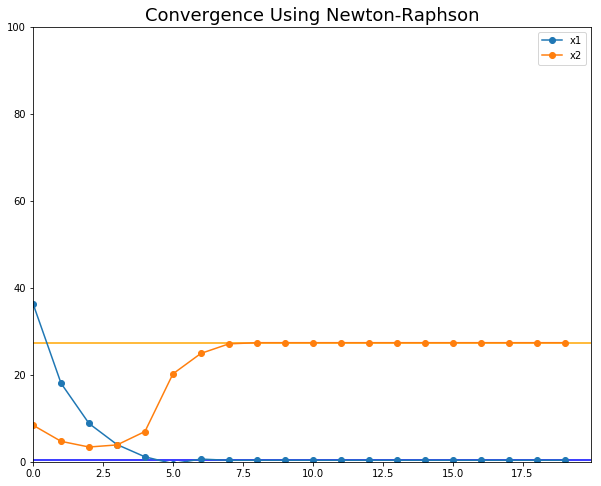

In [84]:
#Plotting commands showing convergence of x1 and x2 to solutions.
fig = plt.figure(figsize=(10, 8))

plt.axhline(y=x1, color='blue')
plt.axhline(y=x2, color='orange')
plt.plot(line1, 'o-', label='x1')
plt.plot(line2, 'o-', label='x2')

plt.xlim(xmin=0)
plt.ylim(0, 100)
plt.title("Convergence Using Newton-Raphson", fontsize=18)
plt.legend()
plt.show()